### 크롤링으로 수집한 리뷰 정보의 워드클라우드
- Java 설치 및 환경 설정
- 각종 패키지 설치
- 한국어 폰트 설정(이건 기본 폰트 사용해도 된다.)

In [1]:
from policy_scrapper import Web_scraping
from preprocessing_text import clean_text, remove_stopwords, extract_nouns
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
### 만약 데이터 프레임이 생성이 안되었다면 이 코드 실행
### my_df = Web_scraping(max_click_nextpage=1)

In [3]:
# 이전에 크롤링한 데이터 프로엠 로드
df = pd.read_csv('seoul_policy_reviews.csv')
df.head()

,Title,Review,Writer,Category,Update Date
0,청년수당 정책후기,서울에서 자취를 하며 고시공부를 하다가 포기 후 취업을 준비하게 되었습니다.\n벌이...,이**,2024/1 청년수당,2024-07-02
1,부담을 덜어준 고마운 정책,청년수당을 취업준비에 필요한 비용과 취업 준비 비용으로 대부분 사용하였습니다. 면접...,유**,2024/1 청년수당,2024-07-02
2,청년수당 정책후기,청년수당 정책후기 말씀드리면 일단 가장 힘든 부분이 경제적부분인데 그 부분을 지원해...,김**,2024/1 청년수당,2024-07-02
3,청년수당 후기,청년수당 선정되어 직업적성의 고민의 시기에\n<br>안정적인 생활을 할 수 있게 되...,송**,2024/1 청년수당,2024-07-02
4,이런 정책 너무 좋습니다.,한달에 소비되는 교통비가 거의 10만원에 가까웠는데 이 정책 덕분에 교통비를 사용하...,김**,2023/1 대중교통비지원(티머니),2024-07-01


In [4]:
# 불용어가 저장되어 있는 텍스트 파일 로드
file_path = 'stopword.txt'

# 불용어 파일을 읽어서 set 형태로 저장
with open(file_path, 'r', encoding='utf-8') as f:
    stopwords = set([word.strip() for word in f.readlines()])

In [5]:
# 불용어 예시
print(stopwords)

{'모두', '이러이러하다', '불구하고', '하물며', '이로 인하여', '휘익', '만약', '입장에서', '아니라면', '누구', '물론', '어느해', '총적으로', '그러나', '언젠가', '응', '아이', '를', '첫번째로', '비걱거리다', '이젠', '단지', '얼마간', '향하여', '요컨대', '펄렁', '하게하다', '위하여', '딩동', '이쪽', '때가 되어', '어', '이르기까지', '하는바', '관련이 있다', '그때', '겸사겸사', '전후', '놀라다', '따위', '여', '붕붕', '전자', '갖고말하자면', '하여금', '어기여차', '대로 하다', '까악', '이었다', '허허', '이만큼', '어떤것', '여기', '설령', '오직', '이', '할수있다', '콸콸', '만큼\t어찌됏든', '한데', '쾅쾅', '그렇지 않으면', '생각한대로', '임에 틀림없다', '어느 년도', '이렇구나', '바꾸어말하자면', '이천구', '쪽으로', '한적이있다', '등', '근거로', '뚝뚝', '관계가 있다', '이렇다', '일반적으로', '이다', '로', '기점으로', '다음', '아무도', '잠깐', '의지하여', '할지라도', '하는것이 낫다', '하는것도', '들', '향하다', '마저', '에 있다', '그러면', '예', '타인', '틈타', '안 그러면', '예하면', '까지', '다만', '실로', '하기보다는', '이천팔', '이렇게 많은 것', '흐흐', '여섯', '참나', '형식으로 쓰여', '할망정', '에 가서', '거의', '향해서', '그리고', '따라서', '아니었다면', '할만하다', '부류의 사람들', '칠', '그저', '관계없이', '우선', '시키다', '결과에 이르다', '우에 종합한것과같이', '어때', '언제', '에', '하지만', '어떻다', '그런즉', '하려고하다', '것과 같이', '자신', '것들', '끙끙', '겨우', '견지에서', '와 같은 사람들', '함께',

In [6]:
# 텍스트 데이터에서의 특수 기호 제거
df['cleaned_review'] = df['Review'].apply(clean_text)

# 불용어 제거
df['processed_review'] = df['cleaned_review'].apply(lambda x: remove_stopwords(x, stopwords))

# 명사 추출
df['nouns'] = df['processed_review'].apply(extract_nouns)

In [7]:
# 모든 명사 정보 리스트화
all_nouns_list = df['nouns'].sum()

# 명사형 정보의 집합
word_counts = Counter(all_nouns_list)

# top 100개의 빈도수만을 추
top_100_words = dict(word_counts.most_common(100))

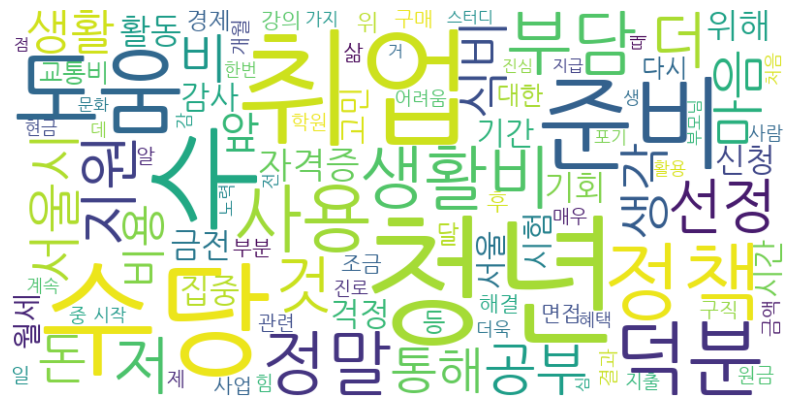

In [8]:
# Generate a word cloud image
wordcloud = WordCloud(font_path = 'NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf', width=800, height=400, background_color='white').generate_from_frequencies(top_100_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()